In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
lo = LeaveOneOut()

In [3]:
data = pd.read_csv('data_tc.csv')

In [4]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']
y = data['MR FCC_A1#2']

<AxesSubplot: >

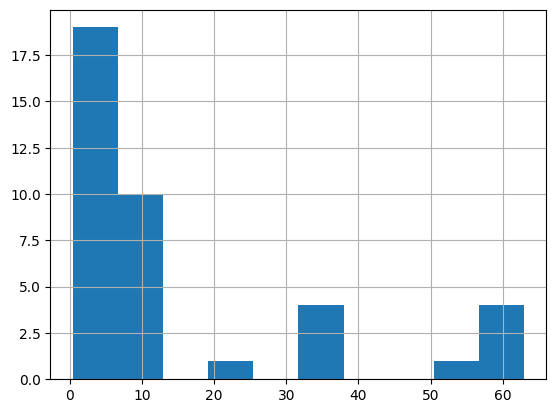

In [5]:
y.hist()

In [6]:
X = np.array(data[columns])
y = np.array(y)

# Lasso

In [7]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 100 candidates, totalling 3900 fits
[CV 1/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/39; 1/100] END ....lasso__alpha=1e-05;, score=-5130.549 total time=   0.0s
[CV 2/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/39; 1/100] END .......lasso__alpha=1e-05;, score=-0.459 total time=   0.0s
[CV 3/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/39; 1/100] END ......lasso__alpha=1e-05;, score=-35.788 total time=   0.0s
[CV 4/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/39; 1/100] END .......lasso__alpha=1e-05;, score=-3.867 total time=   0.0s
[CV 5/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/39; 1/100] END ......lasso__alpha=1e-05;, score=-12.863 total time=   0.0s
[CV 6/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/39; 1/100] END .......lasso__alpha=1e-

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+02, tolerance: 1.454e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.432e+02, tolerance: 1.457e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 20/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-6.048 total time=   0.0s
[CV 21/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 21/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.019 total time=   0.0s
[CV 22/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 22/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-4.866 total time=   0.0s
[CV 23/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 23/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.233 total time=   0.0s
[CV 24/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 24/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-33.073 total time=   0.0s
[CV 25/39; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 25/39; 3/100] END lasso__alpha=0.20203000000000002;, score=-134.282 total time=   0.0s
[CV 26/39; 3/100] START lasso__alpha=0.20203000000000002..

[CV 16/39; 6/100] END ..lasso__alpha=0.50506;, score=-260.903 total time=   0.0s
[CV 17/39; 6/100] START lasso__alpha=0.50506....................................
[CV 17/39; 6/100] END ...lasso__alpha=0.50506;, score=-12.821 total time=   0.0s
[CV 18/39; 6/100] START lasso__alpha=0.50506....................................
[CV 18/39; 6/100] END ...lasso__alpha=0.50506;, score=-19.146 total time=   0.0s
[CV 19/39; 6/100] START lasso__alpha=0.50506....................................
[CV 19/39; 6/100] END ...lasso__alpha=0.50506;, score=-31.933 total time=   0.0s
[CV 20/39; 6/100] START lasso__alpha=0.50506....................................
[CV 20/39; 6/100] END ....lasso__alpha=0.50506;, score=-1.388 total time=   0.0s
[CV 21/39; 6/100] START lasso__alpha=0.50506....................................
[CV 21/39; 6/100] END ....lasso__alpha=0.50506;, score=-1.784 total time=   0.0s
[CV 22/39; 6/100] START lasso__alpha=0.50506....................................
[CV 22/39; 6/100] END ....la

[CV 1/39; 9/100] END ....lasso__alpha=0.80809;, score=-13.939 total time=   0.0s
[CV 2/39; 9/100] START lasso__alpha=0.80809.....................................
[CV 2/39; 9/100] END ....lasso__alpha=0.80809;, score=-34.078 total time=   0.0s
[CV 3/39; 9/100] START lasso__alpha=0.80809.....................................
[CV 3/39; 9/100] END ....lasso__alpha=0.80809;, score=-62.948 total time=   0.0s
[CV 4/39; 9/100] START lasso__alpha=0.80809.....................................
[CV 4/39; 9/100] END ....lasso__alpha=0.80809;, score=-19.228 total time=   0.0s
[CV 5/39; 9/100] START lasso__alpha=0.80809.....................................
[CV 5/39; 9/100] END ....lasso__alpha=0.80809;, score=-34.636 total time=   0.0s
[CV 6/39; 9/100] START lasso__alpha=0.80809.....................................
[CV 6/39; 9/100] END ....lasso__alpha=0.80809;, score=-25.856 total time=   0.0s
[CV 7/39; 9/100] START lasso__alpha=0.80809.....................................
[CV 7/39; 9/100] END .....la

[CV 1/39; 12/100] END ...lasso__alpha=1.11112;, score=-12.753 total time=   0.0s
[CV 2/39; 12/100] START lasso__alpha=1.11112....................................
[CV 2/39; 12/100] END ...lasso__alpha=1.11112;, score=-29.564 total time=   0.0s
[CV 3/39; 12/100] START lasso__alpha=1.11112....................................
[CV 3/39; 12/100] END ...lasso__alpha=1.11112;, score=-66.252 total time=   0.0s
[CV 4/39; 12/100] START lasso__alpha=1.11112....................................
[CV 4/39; 12/100] END ...lasso__alpha=1.11112;, score=-22.223 total time=   0.0s
[CV 5/39; 12/100] START lasso__alpha=1.11112....................................
[CV 5/39; 12/100] END ...lasso__alpha=1.11112;, score=-38.148 total time=   0.0s
[CV 6/39; 12/100] START lasso__alpha=1.11112....................................
[CV 6/39; 12/100] END ...lasso__alpha=1.11112;, score=-29.102 total time=   0.0s
[CV 7/39; 12/100] START lasso__alpha=1.11112....................................
[CV 7/39; 12/100] END ...las

[CV 8/39; 15/100] END ..lasso__alpha=1.41415;, score=-164.990 total time=   0.0s
[CV 9/39; 15/100] START lasso__alpha=1.41415....................................
[CV 9/39; 15/100] END ...lasso__alpha=1.41415;, score=-28.094 total time=   0.0s
[CV 10/39; 15/100] START lasso__alpha=1.41415...................................
[CV 10/39; 15/100] END ..lasso__alpha=1.41415;, score=-32.637 total time=   0.0s
[CV 11/39; 15/100] START lasso__alpha=1.41415...................................
[CV 11/39; 15/100] END .lasso__alpha=1.41415;, score=-175.525 total time=   0.0s
[CV 12/39; 15/100] START lasso__alpha=1.41415...................................
[CV 12/39; 15/100] END .lasso__alpha=1.41415;, score=-108.995 total time=   0.0s
[CV 13/39; 15/100] START lasso__alpha=1.41415...................................
[CV 13/39; 15/100] END ..lasso__alpha=1.41415;, score=-55.005 total time=   0.0s
[CV 14/39; 15/100] START lasso__alpha=1.41415...................................
[CV 14/39; 15/100] END ...la

[CV 28/39; 17/100] END ...lasso__alpha=1.61617;, score=-9.965 total time=   0.0s
[CV 29/39; 17/100] START lasso__alpha=1.61617...................................
[CV 29/39; 17/100] END ...lasso__alpha=1.61617;, score=-6.193 total time=   0.0s
[CV 30/39; 17/100] START lasso__alpha=1.61617...................................
[CV 30/39; 17/100] END ...lasso__alpha=1.61617;, score=-8.642 total time=   0.0s
[CV 31/39; 17/100] START lasso__alpha=1.61617...................................
[CV 31/39; 17/100] END ...lasso__alpha=1.61617;, score=-3.325 total time=   0.0s
[CV 32/39; 17/100] START lasso__alpha=1.61617...................................
[CV 32/39; 17/100] END .lasso__alpha=1.61617;, score=-606.835 total time=   0.0s
[CV 33/39; 17/100] START lasso__alpha=1.61617...................................
[CV 33/39; 17/100] END ...lasso__alpha=1.61617;, score=-2.731 total time=   0.0s
[CV 34/39; 17/100] START lasso__alpha=1.61617...................................
[CV 34/39; 17/100] END ...la

[CV 16/39; 20/100] END ..lasso__alpha=1.9192;, score=-274.779 total time=   0.0s
[CV 17/39; 20/100] START lasso__alpha=1.9192....................................
[CV 17/39; 20/100] END ....lasso__alpha=1.9192;, score=-2.027 total time=   0.0s
[CV 18/39; 20/100] START lasso__alpha=1.9192....................................
[CV 18/39; 20/100] END ....lasso__alpha=1.9192;, score=-0.025 total time=   0.0s
[CV 19/39; 20/100] START lasso__alpha=1.9192....................................
[CV 19/39; 20/100] END ...lasso__alpha=1.9192;, score=-41.506 total time=   0.0s
[CV 20/39; 20/100] START lasso__alpha=1.9192....................................
[CV 20/39; 20/100] END ....lasso__alpha=1.9192;, score=-0.067 total time=   0.0s
[CV 21/39; 20/100] START lasso__alpha=1.9192....................................
[CV 21/39; 20/100] END ....lasso__alpha=1.9192;, score=-0.012 total time=   0.0s
[CV 22/39; 20/100] START lasso__alpha=1.9192....................................
[CV 22/39; 20/100] END ...la

[CV 4/39; 23/100] END ...lasso__alpha=2.22223;, score=-27.509 total time=   0.0s
[CV 5/39; 23/100] START lasso__alpha=2.22223....................................
[CV 5/39; 23/100] END ...lasso__alpha=2.22223;, score=-44.333 total time=   0.0s
[CV 6/39; 23/100] START lasso__alpha=2.22223....................................
[CV 6/39; 23/100] END ...lasso__alpha=2.22223;, score=-34.748 total time=   0.0s
[CV 7/39; 23/100] START lasso__alpha=2.22223....................................
[CV 7/39; 23/100] END ...lasso__alpha=2.22223;, score=-48.356 total time=   0.0s
[CV 8/39; 23/100] START lasso__alpha=2.22223....................................
[CV 8/39; 23/100] END ..lasso__alpha=2.22223;, score=-120.179 total time=   0.0s
[CV 9/39; 23/100] START lasso__alpha=2.22223....................................
[CV 9/39; 23/100] END ...lasso__alpha=2.22223;, score=-35.428 total time=   0.0s
[CV 10/39; 23/100] START lasso__alpha=2.22223...................................
[CV 10/39; 23/100] END ..las

[CV 33/39; 25/100] END lasso__alpha=2.4242500000000002;, score=-7.285 total time=   0.0s
[CV 34/39; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 34/39; 25/100] END lasso__alpha=2.4242500000000002;, score=-0.986 total time=   0.0s
[CV 35/39; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 35/39; 25/100] END lasso__alpha=2.4242500000000002;, score=-45.243 total time=   0.0s
[CV 36/39; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 36/39; 25/100] END lasso__alpha=2.4242500000000002;, score=-0.284 total time=   0.0s
[CV 37/39; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 37/39; 25/100] END lasso__alpha=2.4242500000000002;, score=-14.698 total time=   0.0s
[CV 38/39; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 38/39; 25/100] END lasso__alpha=2.4242500000000002;, score=-169.287 total time=   0.0s
[CV 39/39; 25/100] START lasso__alpha=2.4242500000000002.

[CV 31/39; 28/100] END ...lasso__alpha=2.72728;, score=-0.567 total time=   0.0s
[CV 32/39; 28/100] START lasso__alpha=2.72728...................................
[CV 32/39; 28/100] END .lasso__alpha=2.72728;, score=-674.500 total time=   0.0s
[CV 33/39; 28/100] START lasso__alpha=2.72728...................................
[CV 33/39; 28/100] END ...lasso__alpha=2.72728;, score=-8.852 total time=   0.0s
[CV 34/39; 28/100] START lasso__alpha=2.72728...................................
[CV 34/39; 28/100] END ...lasso__alpha=2.72728;, score=-0.503 total time=   0.0s
[CV 35/39; 28/100] START lasso__alpha=2.72728...................................
[CV 35/39; 28/100] END ..lasso__alpha=2.72728;, score=-47.076 total time=   0.0s
[CV 36/39; 28/100] START lasso__alpha=2.72728...................................
[CV 36/39; 28/100] END ...lasso__alpha=2.72728;, score=-0.511 total time=   0.0s
[CV 37/39; 28/100] START lasso__alpha=2.72728...................................
[CV 37/39; 28/100] END ..las

[CV 18/39; 31/100] END ...lasso__alpha=3.03031;, score=-1.835 total time=   0.0s
[CV 19/39; 31/100] START lasso__alpha=3.03031...................................
[CV 19/39; 31/100] END ..lasso__alpha=3.03031;, score=-47.573 total time=   0.0s
[CV 20/39; 31/100] START lasso__alpha=3.03031...................................
[CV 20/39; 31/100] END ...lasso__alpha=3.03031;, score=-0.806 total time=   0.0s
[CV 21/39; 31/100] START lasso__alpha=3.03031...................................
[CV 21/39; 31/100] END ...lasso__alpha=3.03031;, score=-0.561 total time=   0.0s
[CV 22/39; 31/100] START lasso__alpha=3.03031...................................
[CV 22/39; 31/100] END ..lasso__alpha=3.03031;, score=-16.934 total time=   0.0s
[CV 23/39; 31/100] START lasso__alpha=3.03031...................................
[CV 23/39; 31/100] END .lasso__alpha=3.03031;, score=-245.772 total time=   0.0s
[CV 24/39; 31/100] START lasso__alpha=3.03031...................................
[CV 24/39; 31/100] END ..las

[CV 30/39; 34/100] END ...lasso__alpha=3.33334;, score=-1.988 total time=   0.0s
[CV 31/39; 34/100] START lasso__alpha=3.33334...................................
[CV 31/39; 34/100] END ...lasso__alpha=3.33334;, score=-0.089 total time=   0.0s
[CV 32/39; 34/100] START lasso__alpha=3.33334...................................
[CV 32/39; 34/100] END .lasso__alpha=3.33334;, score=-708.413 total time=   0.0s
[CV 33/39; 34/100] START lasso__alpha=3.33334...................................
[CV 33/39; 34/100] END ..lasso__alpha=3.33334;, score=-11.167 total time=   0.0s
[CV 34/39; 34/100] START lasso__alpha=3.33334...................................
[CV 34/39; 34/100] END ...lasso__alpha=3.33334;, score=-0.117 total time=   0.0s
[CV 35/39; 34/100] START lasso__alpha=3.33334...................................
[CV 35/39; 34/100] END ..lasso__alpha=3.33334;, score=-48.073 total time=   0.0s
[CV 36/39; 34/100] START lasso__alpha=3.33334...................................
[CV 36/39; 34/100] END ...la

[CV 5/39; 37/100] END lasso__alpha=3.6363700000000003;, score=-46.540 total time=   0.0s
[CV 6/39; 37/100] START lasso__alpha=3.6363700000000003.........................
[CV 6/39; 37/100] END lasso__alpha=3.6363700000000003;, score=-36.713 total time=   0.0s
[CV 7/39; 37/100] START lasso__alpha=3.6363700000000003.........................
[CV 7/39; 37/100] END lasso__alpha=3.6363700000000003;, score=-63.666 total time=   0.0s
[CV 8/39; 37/100] START lasso__alpha=3.6363700000000003.........................
[CV 8/39; 37/100] END lasso__alpha=3.6363700000000003;, score=-85.251 total time=   0.0s
[CV 9/39; 37/100] START lasso__alpha=3.6363700000000003.........................
[CV 9/39; 37/100] END lasso__alpha=3.6363700000000003;, score=-45.459 total time=   0.0s
[CV 10/39; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 10/39; 37/100] END lasso__alpha=3.6363700000000003;, score=-49.604 total time=   0.0s
[CV 11/39; 37/100] START lasso__alpha=3.6363700000000003....

[CV 19/39; 39/100] END ..lasso__alpha=3.83839;, score=-48.913 total time=   0.0s
[CV 20/39; 39/100] START lasso__alpha=3.83839...................................
[CV 20/39; 39/100] END ...lasso__alpha=3.83839;, score=-1.922 total time=   0.0s
[CV 21/39; 39/100] START lasso__alpha=3.83839...................................
[CV 21/39; 39/100] END ...lasso__alpha=3.83839;, score=-1.532 total time=   0.0s
[CV 22/39; 39/100] START lasso__alpha=3.83839...................................
[CV 22/39; 39/100] END ..lasso__alpha=3.83839;, score=-20.392 total time=   0.0s
[CV 23/39; 39/100] START lasso__alpha=3.83839...................................
[CV 23/39; 39/100] END .lasso__alpha=3.83839;, score=-366.303 total time=   0.0s
[CV 24/39; 39/100] START lasso__alpha=3.83839...................................
[CV 24/39; 39/100] END ..lasso__alpha=3.83839;, score=-24.509 total time=   0.0s
[CV 25/39; 39/100] START lasso__alpha=3.83839...................................
[CV 25/39; 39/100] END ..las

[CV 29/39; 41/100] END ...lasso__alpha=4.04041;, score=-0.185 total time=   0.0s
[CV 30/39; 41/100] START lasso__alpha=4.04041...................................
[CV 30/39; 41/100] END ...lasso__alpha=4.04041;, score=-0.773 total time=   0.0s
[CV 31/39; 41/100] START lasso__alpha=4.04041...................................
[CV 31/39; 41/100] END ...lasso__alpha=4.04041;, score=-0.054 total time=   0.0s
[CV 32/39; 41/100] START lasso__alpha=4.04041...................................
[CV 32/39; 41/100] END .lasso__alpha=4.04041;, score=-749.020 total time=   0.0s
[CV 33/39; 41/100] START lasso__alpha=4.04041...................................
[CV 33/39; 41/100] END ..lasso__alpha=4.04041;, score=-14.204 total time=   0.0s
[CV 34/39; 41/100] START lasso__alpha=4.04041...................................
[CV 34/39; 41/100] END ...lasso__alpha=4.04041;, score=-0.007 total time=   0.0s
[CV 35/39; 41/100] START lasso__alpha=4.04041...................................
[CV 35/39; 41/100] END ..las

[CV 5/39; 44/100] END lasso__alpha=4.343439999999999;, score=-48.486 total time=   0.0s
[CV 6/39; 44/100] START lasso__alpha=4.343439999999999..........................
[CV 6/39; 44/100] END lasso__alpha=4.343439999999999;, score=-38.444 total time=   0.0s
[CV 7/39; 44/100] START lasso__alpha=4.343439999999999..........................
[CV 7/39; 44/100] END lasso__alpha=4.343439999999999;, score=-67.878 total time=   0.0s
[CV 8/39; 44/100] START lasso__alpha=4.343439999999999..........................
[CV 8/39; 44/100] END lasso__alpha=4.343439999999999;, score=-74.839 total time=   0.0s
[CV 9/39; 44/100] START lasso__alpha=4.343439999999999..........................
[CV 9/39; 44/100] END lasso__alpha=4.343439999999999;, score=-49.232 total time=   0.0s
[CV 10/39; 44/100] START lasso__alpha=4.343439999999999.........................
[CV 10/39; 44/100] END lasso__alpha=4.343439999999999;, score=-52.160 total time=   0.0s
[CV 11/39; 44/100] START lasso__alpha=4.343439999999999...........

[CV 28/39; 46/100] END lasso__alpha=4.545459999999999;, score=-31.759 total time=   0.0s
[CV 29/39; 46/100] START lasso__alpha=4.545459999999999.........................
[CV 29/39; 46/100] END lasso__alpha=4.545459999999999;, score=-0.003 total time=   0.0s
[CV 30/39; 46/100] START lasso__alpha=4.545459999999999.........................
[CV 30/39; 46/100] END lasso__alpha=4.545459999999999;, score=-0.250 total time=   0.0s
[CV 31/39; 46/100] START lasso__alpha=4.545459999999999.........................
[CV 31/39; 46/100] END lasso__alpha=4.545459999999999;, score=-0.375 total time=   0.0s
[CV 32/39; 46/100] START lasso__alpha=4.545459999999999.........................
[CV 32/39; 46/100] END lasso__alpha=4.545459999999999;, score=-778.718 total time=   0.0s
[CV 33/39; 46/100] START lasso__alpha=4.545459999999999.........................
[CV 33/39; 46/100] END lasso__alpha=4.545459999999999;, score=-16.598 total time=   0.0s
[CV 34/39; 46/100] START lasso__alpha=4.545459999999999........

[CV 2/39; 49/100] END ....lasso__alpha=4.84849;, score=-0.134 total time=   0.0s
[CV 3/39; 49/100] START lasso__alpha=4.84849....................................
[CV 3/39; 49/100] END ...lasso__alpha=4.84849;, score=-80.863 total time=   0.0s
[CV 4/39; 49/100] START lasso__alpha=4.84849....................................
[CV 4/39; 49/100] END ...lasso__alpha=4.84849;, score=-31.944 total time=   0.0s
[CV 5/39; 49/100] START lasso__alpha=4.84849....................................
[CV 5/39; 49/100] END ...lasso__alpha=4.84849;, score=-49.900 total time=   0.0s
[CV 6/39; 49/100] START lasso__alpha=4.84849....................................
[CV 6/39; 49/100] END ...lasso__alpha=4.84849;, score=-39.705 total time=   0.0s
[CV 7/39; 49/100] START lasso__alpha=4.84849....................................
[CV 7/39; 49/100] END ...lasso__alpha=4.84849;, score=-70.970 total time=   0.0s
[CV 8/39; 49/100] START lasso__alpha=4.84849....................................
[CV 8/39; 49/100] END ...las

[CV 33/39; 51/100] END ..lasso__alpha=5.05051;, score=-19.178 total time=   0.0s
[CV 34/39; 51/100] START lasso__alpha=5.05051...................................
[CV 34/39; 51/100] END ...lasso__alpha=5.05051;, score=-0.483 total time=   0.0s
[CV 35/39; 51/100] START lasso__alpha=5.05051...................................
[CV 35/39; 51/100] END ..lasso__alpha=5.05051;, score=-50.954 total time=   0.0s
[CV 36/39; 51/100] START lasso__alpha=5.05051...................................
[CV 36/39; 51/100] END ...lasso__alpha=5.05051;, score=-4.489 total time=   0.0s
[CV 37/39; 51/100] START lasso__alpha=5.05051...................................
[CV 37/39; 51/100] END ..lasso__alpha=5.05051;, score=-26.180 total time=   0.0s
[CV 38/39; 51/100] START lasso__alpha=5.05051...................................
[CV 38/39; 51/100] END .lasso__alpha=5.05051;, score=-516.603 total time=   0.0s
[CV 39/39; 51/100] START lasso__alpha=5.05051...................................
[CV 39/39; 51/100] END .lass

[CV 19/39; 54/100] END ..lasso__alpha=5.35354;, score=-51.472 total time=   0.0s
[CV 20/39; 54/100] START lasso__alpha=5.35354...................................
[CV 20/39; 54/100] END ...lasso__alpha=5.35354;, score=-5.298 total time=   0.0s
[CV 21/39; 54/100] START lasso__alpha=5.35354...................................
[CV 21/39; 54/100] END ...lasso__alpha=5.35354;, score=-4.636 total time=   0.0s
[CV 22/39; 54/100] START lasso__alpha=5.35354...................................
[CV 22/39; 54/100] END ..lasso__alpha=5.35354;, score=-27.739 total time=   0.0s
[CV 23/39; 54/100] START lasso__alpha=5.35354...................................
[CV 23/39; 54/100] END .lasso__alpha=5.35354;, score=-546.555 total time=   0.0s
[CV 24/39; 54/100] START lasso__alpha=5.35354...................................
[CV 24/39; 54/100] END ..lasso__alpha=5.35354;, score=-11.894 total time=   0.0s
[CV 25/39; 54/100] START lasso__alpha=5.35354...................................
[CV 25/39; 54/100] END ...la

[CV 5/39; 57/100] END lasso__alpha=5.656569999999999;, score=-52.206 total time=   0.0s
[CV 6/39; 57/100] START lasso__alpha=5.656569999999999..........................
[CV 6/39; 57/100] END lasso__alpha=5.656569999999999;, score=-41.764 total time=   0.0s
[CV 7/39; 57/100] START lasso__alpha=5.656569999999999..........................
[CV 7/39; 57/100] END lasso__alpha=5.656569999999999;, score=-76.060 total time=   0.0s
[CV 8/39; 57/100] START lasso__alpha=5.656569999999999..........................
[CV 8/39; 57/100] END lasso__alpha=5.656569999999999;, score=-57.229 total time=   0.0s
[CV 9/39; 57/100] START lasso__alpha=5.656569999999999..........................
[CV 9/39; 57/100] END lasso__alpha=5.656569999999999;, score=-56.637 total time=   0.0s
[CV 10/39; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 10/39; 57/100] END lasso__alpha=5.656569999999999;, score=-57.075 total time=   0.0s
[CV 11/39; 57/100] START lasso__alpha=5.656569999999999...........

[CV 30/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-0.383 total time=   0.0s
[CV 31/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 31/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-2.814 total time=   0.0s
[CV 32/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 32/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-858.602 total time=   0.0s
[CV 33/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 33/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-23.707 total time=   0.0s
[CV 34/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 34/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-1.406 total time=   0.0s
[CV 35/39; 59/100] START lasso__alpha=5.8585899999999995........................
[CV 35/39; 59/100] END lasso__alpha=5.8585899999999995;, score=-51.865 total time=   0.0s
[CV 36/39; 59/100] START lasso__alpha=5.8585899999999995.

[CV 8/39; 62/100] END ...lasso__alpha=6.16162;, score=-49.803 total time=   0.0s
[CV 9/39; 62/100] START lasso__alpha=6.16162....................................
[CV 9/39; 62/100] END ...lasso__alpha=6.16162;, score=-59.255 total time=   0.0s
[CV 10/39; 62/100] START lasso__alpha=6.16162...................................
[CV 10/39; 62/100] END ..lasso__alpha=6.16162;, score=-58.141 total time=   0.0s
[CV 11/39; 62/100] START lasso__alpha=6.16162...................................
[CV 11/39; 62/100] END .lasso__alpha=6.16162;, score=-218.264 total time=   0.0s
[CV 12/39; 62/100] START lasso__alpha=6.16162...................................
[CV 12/39; 62/100] END .lasso__alpha=6.16162;, score=-143.757 total time=   0.0s
[CV 13/39; 62/100] START lasso__alpha=6.16162...................................
[CV 13/39; 62/100] END .lasso__alpha=6.16162;, score=-102.284 total time=   0.0s
[CV 14/39; 62/100] START lasso__alpha=6.16162...................................
[CV 14/39; 62/100] END ..las

[CV 11/39; 64/100] END .lasso__alpha=6.36364;, score=-218.431 total time=   0.0s
[CV 12/39; 64/100] START lasso__alpha=6.36364...................................
[CV 12/39; 64/100] END .lasso__alpha=6.36364;, score=-143.892 total time=   0.0s
[CV 13/39; 64/100] START lasso__alpha=6.36364...................................
[CV 13/39; 64/100] END .lasso__alpha=6.36364;, score=-103.604 total time=   0.0s
[CV 14/39; 64/100] START lasso__alpha=6.36364...................................
[CV 14/39; 64/100] END ..lasso__alpha=6.36364;, score=-27.069 total time=   0.0s
[CV 15/39; 64/100] START lasso__alpha=6.36364...................................
[CV 15/39; 64/100] END .lasso__alpha=6.36364;, score=-345.839 total time=   0.0s
[CV 16/39; 64/100] START lasso__alpha=6.36364...................................
[CV 16/39; 64/100] END .lasso__alpha=6.36364;, score=-191.959 total time=   0.0s
[CV 17/39; 64/100] START lasso__alpha=6.36364...................................
[CV 17/39; 64/100] END ...la

[CV 26/39; 66/100] END lasso__alpha=6.565659999999999;, score=-21.744 total time=   0.0s
[CV 27/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 27/39; 66/100] END lasso__alpha=6.565659999999999;, score=-1.528 total time=   0.0s
[CV 28/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 28/39; 66/100] END lasso__alpha=6.565659999999999;, score=-45.772 total time=   0.0s
[CV 29/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 29/39; 66/100] END lasso__alpha=6.565659999999999;, score=-4.381 total time=   0.0s
[CV 30/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 30/39; 66/100] END lasso__alpha=6.565659999999999;, score=-2.773 total time=   0.0s
[CV 31/39; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 31/39; 66/100] END lasso__alpha=6.565659999999999;, score=-7.421 total time=   0.0s
[CV 32/39; 66/100] START lasso__alpha=6.565659999999999..........

[CV 26/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-19.812 total time=   0.0s
[CV 27/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 27/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-2.301 total time=   0.0s
[CV 28/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 28/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-47.360 total time=   0.0s
[CV 29/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 29/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-5.723 total time=   0.0s
[CV 30/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 30/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-3.858 total time=   0.0s
[CV 31/39; 68/100] START lasso__alpha=6.7676799999999995........................
[CV 31/39; 68/100] END lasso__alpha=6.7676799999999995;, score=-9.139 total time=   0.0s
[CV 32/39; 68/100] START lasso__alpha=6.7676799999999995...

[CV 12/39; 71/100] END .lasso__alpha=7.07071;, score=-144.367 total time=   0.0s
[CV 13/39; 71/100] START lasso__alpha=7.07071...................................
[CV 13/39; 71/100] END .lasso__alpha=7.07071;, score=-108.292 total time=   0.0s
[CV 14/39; 71/100] START lasso__alpha=7.07071...................................
[CV 14/39; 71/100] END ..lasso__alpha=7.07071;, score=-32.150 total time=   0.0s
[CV 15/39; 71/100] START lasso__alpha=7.07071...................................
[CV 15/39; 71/100] END .lasso__alpha=7.07071;, score=-398.971 total time=   0.0s
[CV 16/39; 71/100] START lasso__alpha=7.07071...................................
[CV 16/39; 71/100] END .lasso__alpha=7.07071;, score=-179.229 total time=   0.0s
[CV 17/39; 71/100] START lasso__alpha=7.07071...................................
[CV 17/39; 71/100] END ...lasso__alpha=7.07071;, score=-3.948 total time=   0.0s
[CV 18/39; 71/100] START lasso__alpha=7.07071...................................
[CV 18/39; 71/100] END ..las

[CV 6/39; 74/100] END ...lasso__alpha=7.37374;, score=-42.597 total time=   0.0s
[CV 7/39; 74/100] START lasso__alpha=7.37374....................................
[CV 7/39; 74/100] END ...lasso__alpha=7.37374;, score=-82.243 total time=   0.0s
[CV 8/39; 74/100] START lasso__alpha=7.37374....................................
[CV 8/39; 74/100] END ...lasso__alpha=7.37374;, score=-34.085 total time=   0.0s
[CV 9/39; 74/100] START lasso__alpha=7.37374....................................
[CV 9/39; 74/100] END ...lasso__alpha=7.37374;, score=-65.417 total time=   0.0s
[CV 10/39; 74/100] START lasso__alpha=7.37374...................................
[CV 10/39; 74/100] END ..lasso__alpha=7.37374;, score=-60.227 total time=   0.0s
[CV 11/39; 74/100] START lasso__alpha=7.37374...................................
[CV 11/39; 74/100] END .lasso__alpha=7.37374;, score=-219.267 total time=   0.0s
[CV 12/39; 74/100] START lasso__alpha=7.37374...................................
[CV 12/39; 74/100] END .lass

[CV 20/39; 76/100] END ..lasso__alpha=7.57576;, score=-14.017 total time=   0.0s
[CV 21/39; 76/100] START lasso__alpha=7.57576...................................
[CV 21/39; 76/100] END ..lasso__alpha=7.57576;, score=-12.927 total time=   0.0s
[CV 22/39; 76/100] START lasso__alpha=7.57576...................................
[CV 22/39; 76/100] END ..lasso__alpha=7.57576;, score=-40.453 total time=   0.0s
[CV 23/39; 76/100] START lasso__alpha=7.57576...................................
[CV 23/39; 76/100] END .lasso__alpha=7.57576;, score=-791.991 total time=   0.0s
[CV 24/39; 76/100] START lasso__alpha=7.57576...................................
[CV 24/39; 76/100] END ...lasso__alpha=7.57576;, score=-0.494 total time=   0.0s
[CV 25/39; 76/100] START lasso__alpha=7.57576...................................
[CV 25/39; 76/100] END ...lasso__alpha=7.57576;, score=-0.146 total time=   0.0s
[CV 26/39; 76/100] START lasso__alpha=7.57576...................................
[CV 26/39; 76/100] END ..las

[CV 17/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-6.355 total time=   0.0s
[CV 18/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 18/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-27.293 total time=   0.0s
[CV 19/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 19/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-49.056 total time=   0.0s
[CV 20/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 20/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-15.557 total time=   0.0s
[CV 21/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 21/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-14.407 total time=   0.0s
[CV 22/39; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 22/39; 79/100] END lasso__alpha=7.8787899999999995;, score=-42.367 total time=   0.0s
[CV 23/39; 79/100] START lasso__alpha=7.8787899999999995

[CV 18/39; 82/100] END ..lasso__alpha=8.18182;, score=-30.136 total time=   0.0s
[CV 19/39; 82/100] START lasso__alpha=8.18182...................................
[CV 19/39; 82/100] END ..lasso__alpha=8.18182;, score=-48.641 total time=   0.0s
[CV 20/39; 82/100] START lasso__alpha=8.18182...................................
[CV 20/39; 82/100] END ..lasso__alpha=8.18182;, score=-17.176 total time=   0.0s
[CV 21/39; 82/100] START lasso__alpha=8.18182...................................
[CV 21/39; 82/100] END ..lasso__alpha=8.18182;, score=-15.968 total time=   0.0s
[CV 22/39; 82/100] START lasso__alpha=8.18182...................................
[CV 22/39; 82/100] END ..lasso__alpha=8.18182;, score=-44.326 total time=   0.0s
[CV 23/39; 82/100] START lasso__alpha=8.18182...................................
[CV 23/39; 82/100] END .lasso__alpha=8.18182;, score=-866.806 total time=   0.0s
[CV 24/39; 82/100] START lasso__alpha=8.18182...................................
[CV 24/39; 82/100] END ...la

[CV 31/39; 85/100] END ..lasso__alpha=8.48485;, score=-30.968 total time=   0.0s
[CV 32/39; 85/100] START lasso__alpha=8.48485...................................
[CV 32/39; 85/100] END lasso__alpha=8.48485;, score=-1065.470 total time=   0.0s
[CV 33/39; 85/100] START lasso__alpha=8.48485...................................
[CV 33/39; 85/100] END ..lasso__alpha=8.48485;, score=-43.622 total time=   0.0s
[CV 34/39; 85/100] START lasso__alpha=8.48485...................................
[CV 34/39; 85/100] END ...lasso__alpha=8.48485;, score=-8.535 total time=   0.0s
[CV 35/39; 85/100] START lasso__alpha=8.48485...................................
[CV 35/39; 85/100] END ..lasso__alpha=8.48485;, score=-48.228 total time=   0.0s
[CV 36/39; 85/100] START lasso__alpha=8.48485...................................
[CV 36/39; 85/100] END ..lasso__alpha=8.48485;, score=-18.877 total time=   0.0s
[CV 37/39; 85/100] START lasso__alpha=8.48485...................................
[CV 37/39; 85/100] END ..las

[CV 26/39; 88/100] END ...lasso__alpha=8.78788;, score=-5.435 total time=   0.0s
[CV 27/39; 88/100] START lasso__alpha=8.78788...................................
[CV 27/39; 88/100] END ..lasso__alpha=8.78788;, score=-18.699 total time=   0.0s
[CV 28/39; 88/100] START lasso__alpha=8.78788...................................
[CV 28/39; 88/100] END ..lasso__alpha=8.78788;, score=-64.721 total time=   0.0s
[CV 29/39; 88/100] START lasso__alpha=8.78788...................................
[CV 29/39; 88/100] END ..lasso__alpha=8.78788;, score=-28.971 total time=   0.0s
[CV 30/39; 88/100] START lasso__alpha=8.78788...................................
[CV 30/39; 88/100] END ..lasso__alpha=8.78788;, score=-24.547 total time=   0.0s
[CV 31/39; 88/100] START lasso__alpha=8.78788...................................
[CV 31/39; 88/100] END ..lasso__alpha=8.78788;, score=-36.161 total time=   0.0s
[CV 32/39; 88/100] START lasso__alpha=8.78788...................................
[CV 32/39; 88/100] END lasso

[CV 21/39; 91/100] END ..lasso__alpha=9.09091;, score=-21.130 total time=   0.0s
[CV 22/39; 91/100] START lasso__alpha=9.09091...................................
[CV 22/39; 91/100] END ..lasso__alpha=9.09091;, score=-50.468 total time=   0.0s
[CV 23/39; 91/100] START lasso__alpha=9.09091...................................
[CV 23/39; 91/100] END .lasso__alpha=9.09091;, score=-985.357 total time=   0.0s
[CV 24/39; 91/100] START lasso__alpha=9.09091...................................
[CV 24/39; 91/100] END ...lasso__alpha=9.09091;, score=-1.492 total time=   0.0s
[CV 25/39; 91/100] START lasso__alpha=9.09091...................................
[CV 25/39; 91/100] END ...lasso__alpha=9.09091;, score=-5.319 total time=   0.0s
[CV 26/39; 91/100] START lasso__alpha=9.09091...................................
[CV 26/39; 91/100] END ...lasso__alpha=9.09091;, score=-4.054 total time=   0.0s
[CV 27/39; 91/100] START lasso__alpha=9.09091...................................
[CV 27/39; 91/100] END ..las

[CV 1/39; 94/100] END ...lasso__alpha=9.39394;, score=-37.770 total time=   0.0s
[CV 2/39; 94/100] START lasso__alpha=9.39394....................................
[CV 2/39; 94/100] END ...lasso__alpha=9.39394;, score=-22.898 total time=   0.0s
[CV 3/39; 94/100] START lasso__alpha=9.39394....................................
[CV 3/39; 94/100] END ...lasso__alpha=9.39394;, score=-85.878 total time=   0.0s
[CV 4/39; 94/100] START lasso__alpha=9.39394....................................
[CV 4/39; 94/100] END ...lasso__alpha=9.39394;, score=-35.232 total time=   0.0s
[CV 5/39; 94/100] START lasso__alpha=9.39394....................................
[CV 5/39; 94/100] END ...lasso__alpha=9.39394;, score=-53.933 total time=   0.0s
[CV 6/39; 94/100] START lasso__alpha=9.39394....................................
[CV 6/39; 94/100] END ...lasso__alpha=9.39394;, score=-43.338 total time=   0.0s
[CV 7/39; 94/100] START lasso__alpha=9.39394....................................
[CV 7/39; 94/100] END ...las

[CV 33/39; 96/100] END ..lasso__alpha=9.59596;, score=-53.861 total time=   0.0s
[CV 34/39; 96/100] START lasso__alpha=9.59596...................................
[CV 34/39; 96/100] END ..lasso__alpha=9.59596;, score=-13.365 total time=   0.0s
[CV 35/39; 96/100] START lasso__alpha=9.59596...................................
[CV 35/39; 96/100] END ..lasso__alpha=9.59596;, score=-46.729 total time=   0.0s
[CV 36/39; 96/100] START lasso__alpha=9.59596...................................
[CV 36/39; 96/100] END ..lasso__alpha=9.59596;, score=-25.797 total time=   0.0s
[CV 37/39; 96/100] START lasso__alpha=9.59596...................................
[CV 37/39; 96/100] END ..lasso__alpha=9.59596;, score=-54.052 total time=   0.0s
[CV 38/39; 96/100] START lasso__alpha=9.59596...................................
[CV 38/39; 96/100] END lasso__alpha=9.59596;, score=-1054.502 total time=   0.0s
[CV 39/39; 96/100] START lasso__alpha=9.59596...................................
[CV 39/39; 96/100] END lasso

[CV 2/39; 100/100] END .....lasso__alpha=10.0;, score=-30.262 total time=   0.0s
[CV 3/39; 100/100] START lasso__alpha=10.0......................................
[CV 3/39; 100/100] END .....lasso__alpha=10.0;, score=-86.192 total time=   0.0s
[CV 4/39; 100/100] START lasso__alpha=10.0......................................
[CV 4/39; 100/100] END .....lasso__alpha=10.0;, score=-35.434 total time=   0.0s
[CV 5/39; 100/100] START lasso__alpha=10.0......................................
[CV 5/39; 100/100] END .....lasso__alpha=10.0;, score=-54.182 total time=   0.0s
[CV 6/39; 100/100] START lasso__alpha=10.0......................................
[CV 6/39; 100/100] END .....lasso__alpha=10.0;, score=-43.561 total time=   0.0s
[CV 7/39; 100/100] START lasso__alpha=10.0......................................
[CV 7/39; 100/100] END .....lasso__alpha=10.0;, score=-91.837 total time=   0.0s
[CV 8/39; 100/100] START lasso__alpha=10.0......................................
[CV 8/39; 100/100] END .....

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x00000196EC535FC0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [8]:
grid.best_params_

{'lasso__alpha': 0.7070799999999999}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.70708))]
#best_lasso = Pipeline(steps)

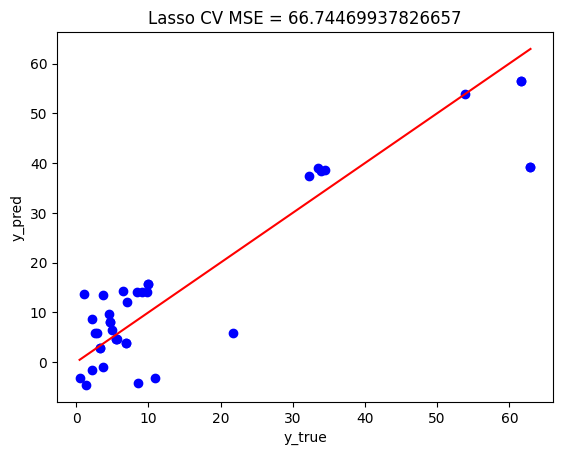

In [9]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [10]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 12 candidates, totalling 468 fits
[CV 1/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-25.970 total time=   0.0s
[CV 2/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-17.126 total time=   0.0s
[CV 3/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1.353 total time=   0.0s
[CV 4/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-20.477 total time=   0.0s
[CV 5/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-9.635 total time=   0.0s
[CV 6/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/39; 1/12] EN

[CV 2/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-59.246 total time=   0.0s
[CV 3/39; 7/12] START max_depth=7, min_samples_leaf=1...........................
[CV 3/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-6.647 total time=   0.0s
[CV 4/39; 7/12] START max_depth=7, min_samples_leaf=1...........................
[CV 4/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-5.331 total time=   0.0s
[CV 5/39; 7/12] START max_depth=7, min_samples_leaf=1...........................
[CV 5/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-2.464 total time=   0.0s
[CV 6/39; 7/12] START max_depth=7, min_samples_leaf=1...........................
[CV 6/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-6.838 total time=   0.0s
[CV 7/39; 7/12] START max_depth=7, min_samples_leaf=1...........................
[CV 7/39; 7/12] END max_depth=7, min_samples_leaf=1;, score=-17.342 total time=   0.0s
[CV 8/39; 7/12] START max_depth=7, min_samples_leaf=1........................

[CV 39/39; 10/12] END max_depth=9, min_samples_leaf=2;, score=-20.746 total time=   0.0s
[CV 1/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 1/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-36.525 total time=   0.0s
[CV 2/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 2/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-59.814 total time=   0.0s
[CV 3/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 3/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-10.536 total time=   0.0s
[CV 4/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 4/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-10.536 total time=   0.0s
[CV 5/39; 11/12] START max_depth=11, min_samples_leaf=1.........................
[CV 5/39; 11/12] END max_depth=11, min_samples_leaf=1;, score=-1.883 total time=   0.0s
[CV 6/39; 11/12] START max_depth=11, min_samples_leaf=1.......

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x00000196EEA646D0>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [11]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 2}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2)

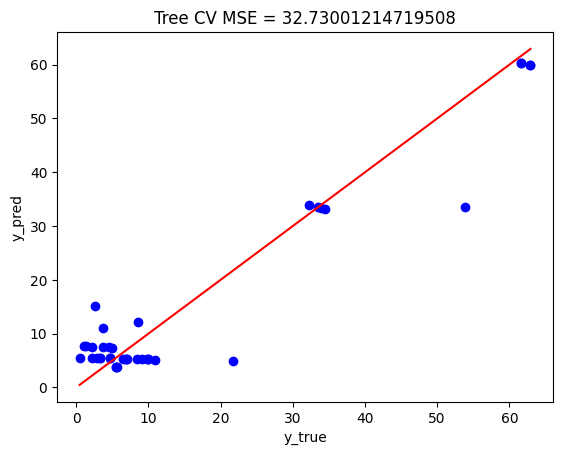

In [12]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# RF

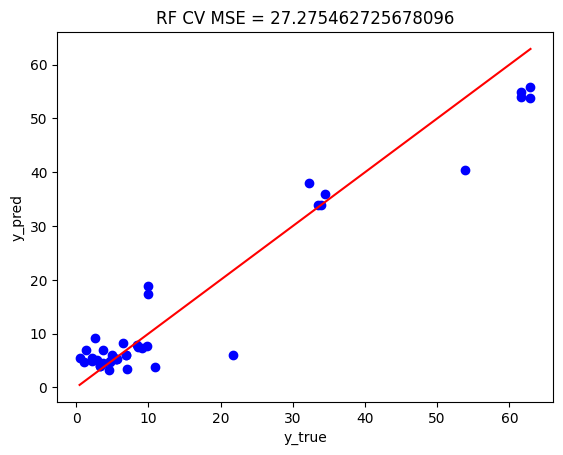

In [13]:
rf = RandomForestRegressor(random_state=42)
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# CB

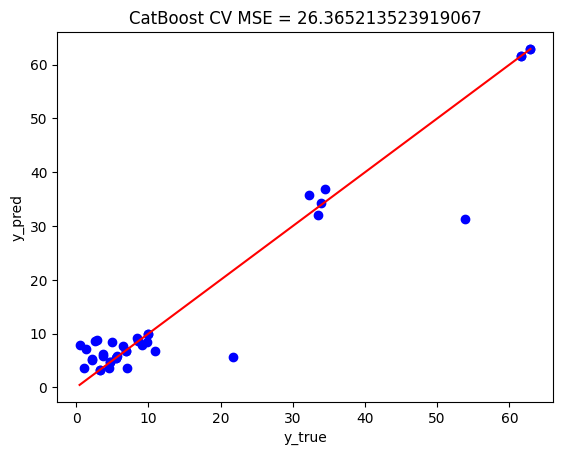

In [14]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')

In [15]:
cb.fit(X, y)

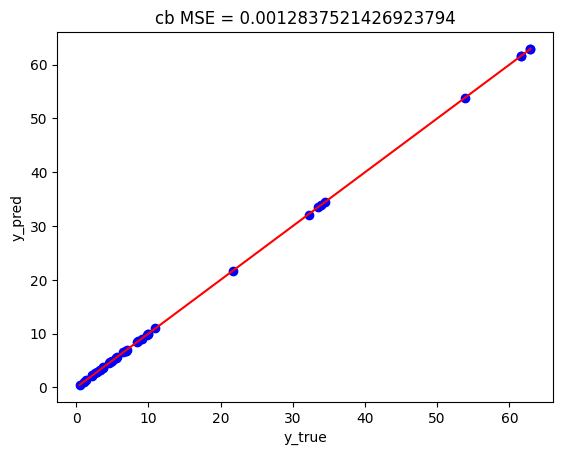

In [16]:
plot_result(cb, X, y, metric=mse ,title='cb')

In [20]:
dump(cb, 'cb_mr_fcc_a1#2.joblib')

['cb_mr_fcc_a1#2.joblib']

# GPR

In [17]:
steps = [('scaler', StandardScaler()), ('gpr', GaussianProcessRegressor(n_restarts_optimizer=5))]
pipeline = Pipeline(steps)

params = {
    'gpr__kernel': [Matern(), RationalQuadratic(), RBF(), DotProduct()]
}

grid = GridSearchCV(pipeline, params, cv=lo, scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 4 candidates, totalling 156 fits
[CV 1/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 1/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.118 total time=   0.0s
[CV 2/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 2/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-3.262 total time=   0.0s
[CV 3/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 3/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-10.105 total time=   0.0s
[CV 4/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 4/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-3.050 total time=   0.0s
[CV 5/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 5/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-11.128 total time=   0.0s
[CV 6/39; 1/4] START gpr__kernel=Matern(length_scal

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 6/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.585 total time=   0.0s
[CV 7/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 7/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-24.116 total time=   0.0s
[CV 8/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 8/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-29.813 total time=   0.0s
[CV 9/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 9/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-1.879 total time=   0.0s
[CV 10/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 10/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.631 total time=   0.0s
[CV 11/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 11/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-7.092 total time=   0.0s
[CV 12/39; 1/4]

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 12/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-9.429 total time=   0.0s
[CV 13/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 13/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-3.017 total time=   0.0s
[CV 14/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 14/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 15/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 15/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-2895.601 total time=   0.0s
[CV 16/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 16/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-468.999 total time=   0.0s
[CV 17/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 17/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 18/3

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 30/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-18.729 total time=   0.0s
[CV 31/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 31/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.063 total time=   0.0s
[CV 32/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 32/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 33/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 33/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 34/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 34/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 35/39; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 35/39; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 36/39; 1

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 5/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-10.409 total time=   0.0s
[CV 6/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 6/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.535 total time=   0.1s
[CV 7/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 7/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-21.664 total time=   0.2s
[CV 8/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 8/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-8.675 total time=   0.0s
[CV 9/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 9/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-33.011 total time=   0.0s
[CV 10/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 10/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.736 total time=   0.0s
[CV 11/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 11/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-11.432 total time=   0.0s
[CV 12/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 12/39; 2/4] END gpr__kernel=RationalQuadratic(

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 13/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.396 total time=   0.2s
[CV 14/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 14/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 15/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 15/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-2407.113 total time=   0.0s
[CV 16/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 16/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-307.735 total time=   0.0s
[CV 17/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 17/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 18/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 18/39; 2/4] END gpr__kernel=RationalQuadr

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 27/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-2.604 total time=   0.0s
[CV 28/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 28/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-64.915 total time=   0.0s
[CV 29/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 29/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-11.535 total time=   0.0s
[CV 30/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 30/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-14.057 total time=   0.0s
[CV 31/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 31/39; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-2.819 total time=   0.0s
[CV 32/39; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 32/39; 2/4] END gpr__kernel=RationalQuadrat

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 10/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-26.566 total time=   0.0s
[CV 11/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 11/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-1.129 total time=   0.0s
[CV 12/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 12/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-1.499 total time=   0.0s
[CV 13/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 13/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.050 total time=   0.0s
[CV 14/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 14/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 15/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 15/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-2896.896 total time=   0.0s
[CV 16/39; 3/4] START gpr__kernel=RBF(length_scale=1)......................

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 34/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 35/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 35/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 36/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 36/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 37/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 37/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 38/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 38/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 39/39; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 39/39; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 1/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

[CV 6/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.639 total time=   0.0s
[CV 7/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 7/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-16455274.960 total time=   0.0s
[CV 8/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 8/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-1339.268 total time=   0.0s
[CV 9/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 9/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-1667.107 total time=   0.0s
[CV 10/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 10/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-494.426 total time=   0.0s
[CV 11/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 11/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-41.866 total time=   0.0s
[CV 12/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 18/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-349.866 total time=   0.0s
[CV 19/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 19/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.147 total time=   0.0s
[CV 20/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 20/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-4.404 total time=   0.0s
[CV 21/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 21/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-8.924 total time=   0.0s
[CV 22/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 22/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.005 total time=   0.0s
[CV 23/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 23/39; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.035 total time=   0.0s
[CV 24/39; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GridSearchCV(cv=LeaveOneOut(),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gpr',
                                        GaussianProcessRegressor(n_restarts_optimizer=5))]),
             param_grid={'gpr__kernel': [Matern(length_scale=1, nu=1.5),
                                         RationalQuadratic(alpha=1, length_scale=1),
                                         RBF(length_scale=1),
                                         DotProduct(sigma_0=1)]},
             scoring='neg_mean_squared_error', verbose=10)

In [18]:
grid.best_params_

{'gpr__kernel': RationalQuadratic(alpha=1, length_scale=1)}

In [ ]:
# Uncomment to get a model
# steps = [('scaler', StandardScaler()), ('gpr', GaussianProcessRegressor(kernel=RationalQuadratic(),n_restarts_optimizer=5))]
# pipeline = Pipeline(steps)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

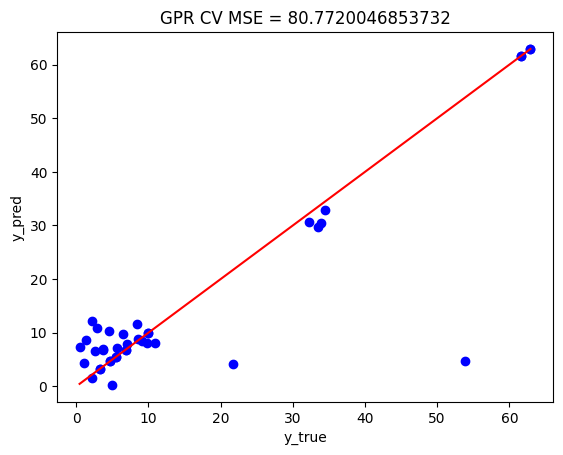

In [19]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='GPR')